# import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from dateutil import relativedelta
from datetime import datetime
from scipy.stats import ttest_ind
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

# 1

In [3]:
# reading a file
df = pd.read_csv('EirGridSystemDemand2014.csv')
df
df['datetime'] = pd.to_datetime(df['Date']) + pd.to_timedelta(df['Time'] + ':00')
df
# df.isnull().sum()

,Date,Time,Demand,datetime
0,1/1/2014,0:00,2899.0,2014-01-01 00:00:00
1,1/1/2014,0:15,2869.0,2014-01-01 00:15:00
2,1/1/2014,0:30,2827.0,2014-01-01 00:30:00
3,1/1/2014,0:45,2787.0,2014-01-01 00:45:00
4,1/1/2014,1:00,2724.0,2014-01-01 01:00:00
...,...,...,...,...
35035,12/31/2014,22:45,2779.0,2014-12-31 22:45:00
35036,12/31/2014,23:00,2876.0,2014-12-31 23:00:00
35037,12/31/2014,23:15,2961.0,2014-12-31 23:15:00
35038,12/31/2014,23:30,2957.0,2014-12-31 23:30:00


In [154]:
# Linear interpolation
df['Demand'] = df['Demand'].interpolate()
df['Demand'].isnull().sum()

0

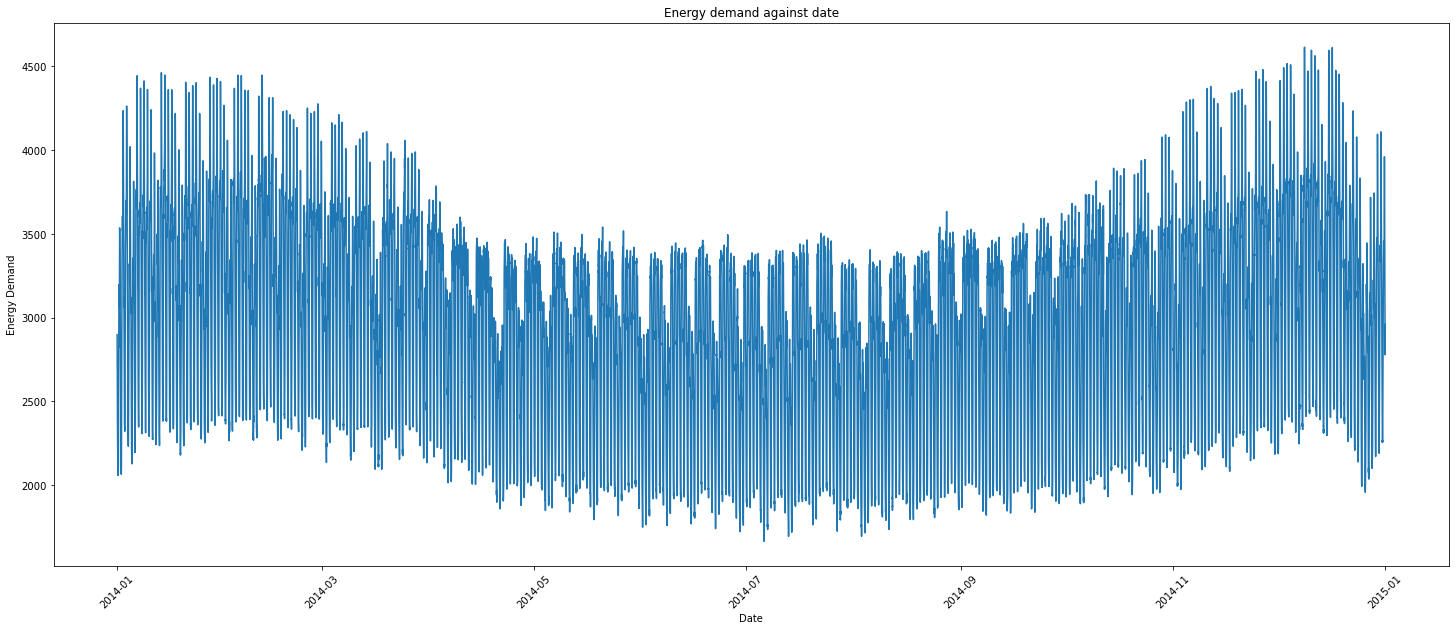

In [155]:
# Plotting
df['datetime'] = pd.to_datetime(df['datetime'], format="%m/%d/%Y") 
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45)
plt.plot(df['datetime'], df['Demand'])
plt.xlabel('Date')
plt.ylabel('Energy Demand')
plt.title('Energy demand against date')
plt.show()

# 2 

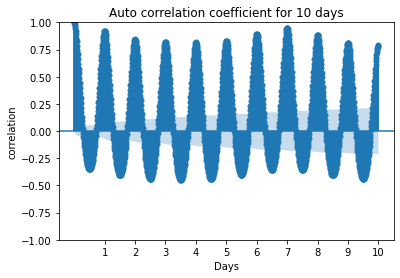

In [156]:
# 10 days lags = 10*24*4 = 960
sm.graphics.tsa.plot_acf(df['Demand'], lags=960, label = "Energy Demand")
plt.xticks(range(96, 961,96), range(1, 11))
plt.xlabel('Days')
plt.ylabel('correlation')
plt.title('Auto correlation coefficient for 10 days')
plt.show()

# 3

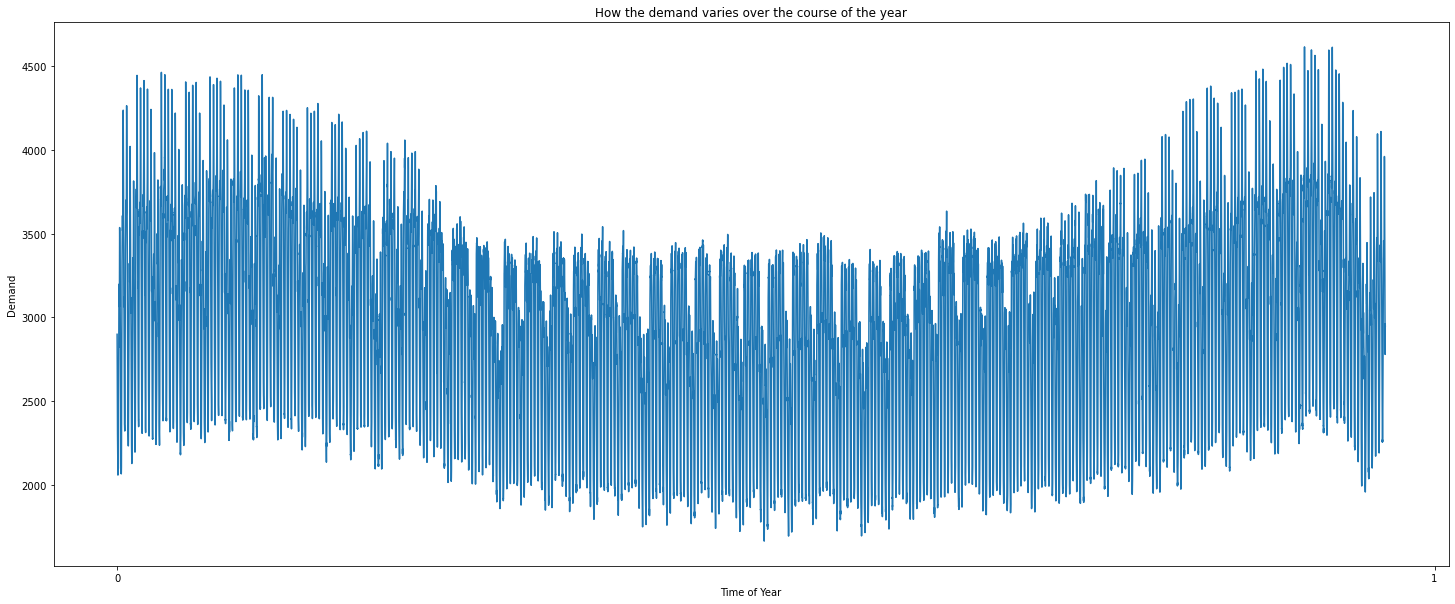

In [157]:
# Calculate the total number of days in the year
num_days = (df['datetime'].iloc[-1] - df['datetime'].iloc[0]).days + 1

# Create a list of fractional days from 0 to 1
frac_days = [float(i) / float(num_days - 1) for i in range(len(df['datetime']))]

# Plot the demand vs. the time of year
plt.figure(figsize=(25,10))
plt.plot(frac_days, df['Demand'])
plt.xticks(range(0, 101,100), range(0, 2))
plt.xlabel('Time of Year')
plt.ylabel('Demand')
plt.title('How the demand varies over the course of the year')
plt.show()

# 4

In [158]:
# calculating monthly average demand
data = df
monthly_avg = data.groupby(pd.Grouper(key='datetime', freq='M'))['Demand'].mean()
monthly_avg.index

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', name='datetime', freq='M')

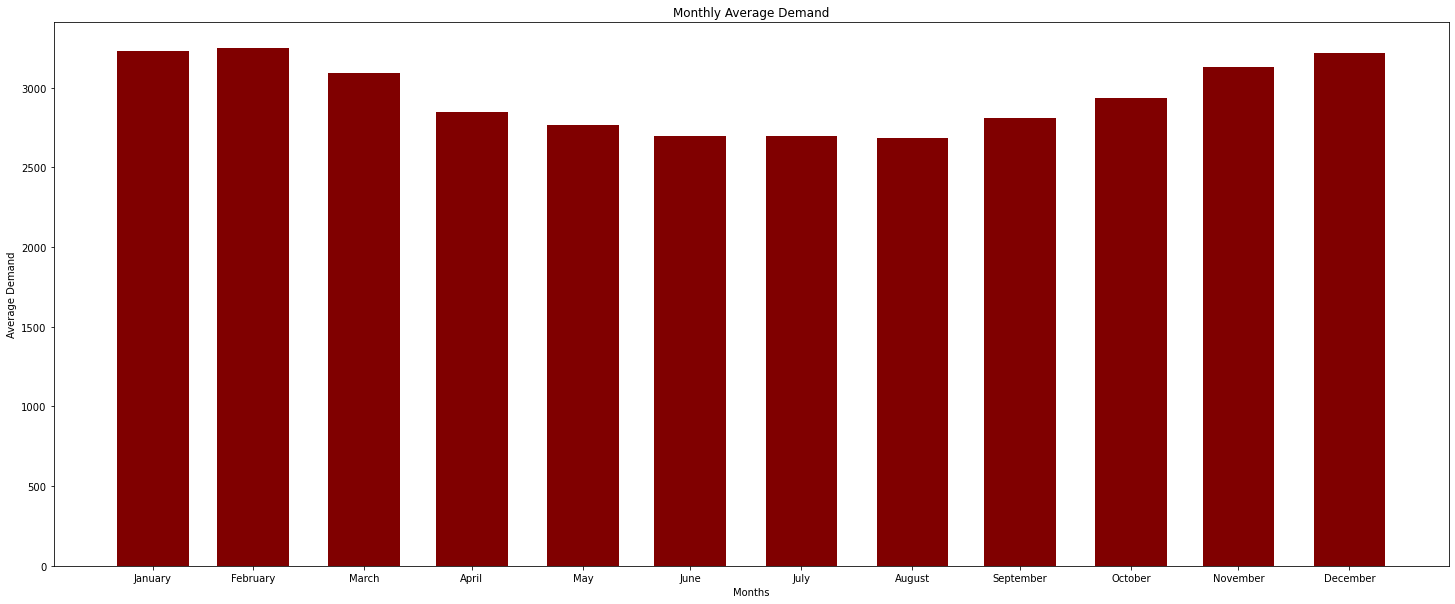

In [159]:
# creating the bar plot
plt.figure(figsize=(25,10))
plt.bar(monthly_avg.index, monthly_avg.values, color ='maroon',
        width = 20)

plt.xticks(monthly_avg.index, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']) 
plt.xlabel("Months")
plt.ylabel("Average Demand")
plt.title("Monthly Average Demand")
plt.show()

# 5

In [160]:
# calculating hourly average demand
hourly_avg = data.groupby(data['datetime'].dt.hour)['Demand'].mean()
hourly_avg

datetime
0     2531.269178
1     2330.620548
2     2193.935616
3     2122.717123
4     2102.480137
5     2116.065068
6     2272.093151
7     2661.797260
8     2990.205479
9     3192.756164
10    3291.715753
11    3342.379452
12    3385.669863
13    3348.401370
14    3288.968493
15    3283.526027
16    3363.330137
17    3537.221233
18    3562.597945
19    3462.590411
20    3334.893151
21    3196.415068
22    2968.543151
23    2760.189726
Name: Demand, dtype: float64

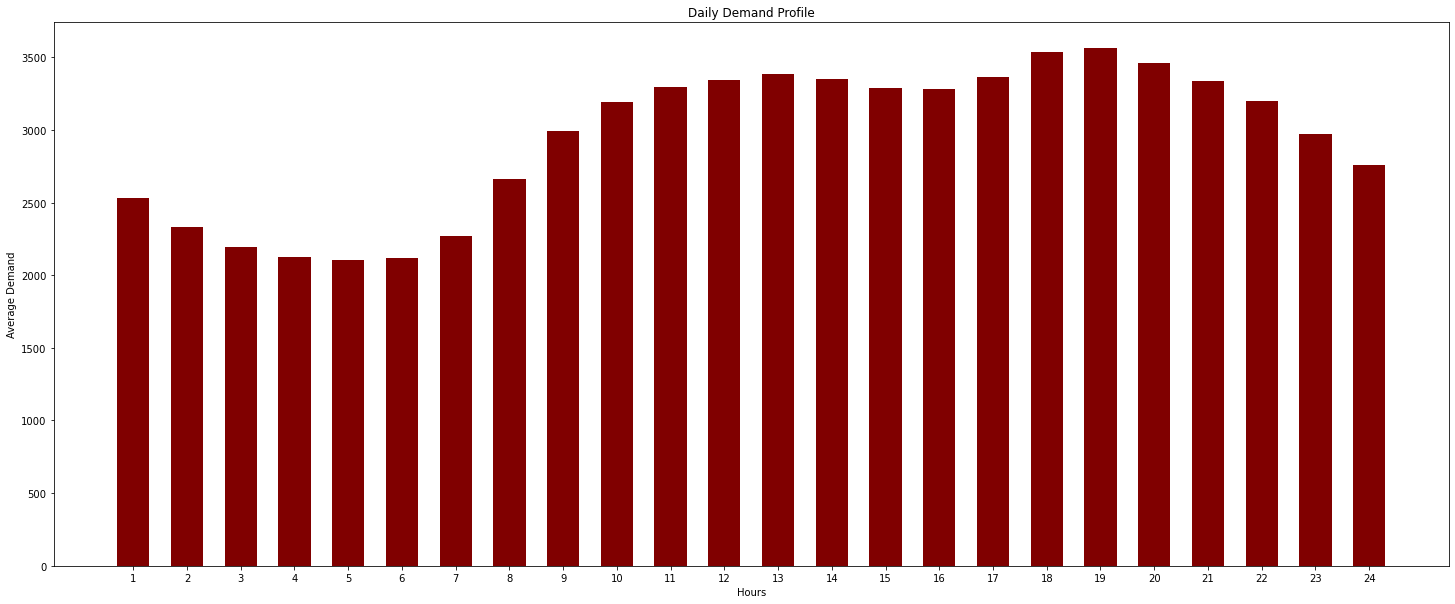

In [161]:
# plotting
plt.figure(figsize=(25,10))
plt.bar(hourly_avg.index, hourly_avg.values, color ='maroon',
        width = 0.6)
plt.xticks(hourly_avg.index, range(1, 25))
plt.xlabel("Hours")
plt.ylabel("Average Demand")
plt.title("Daily Demand Profile")
plt.show()

# 6

In [162]:
#calculating daily average demand
daily_avg = data.groupby(data['datetime'].dt.weekday)['Demand'].mean()
daily_avg

datetime
0    2966.307292
1    3052.404647
2    3059.144458
3    3063.700521
4    3031.418470
5    2783.925681
6    2644.316707
Name: Demand, dtype: float64

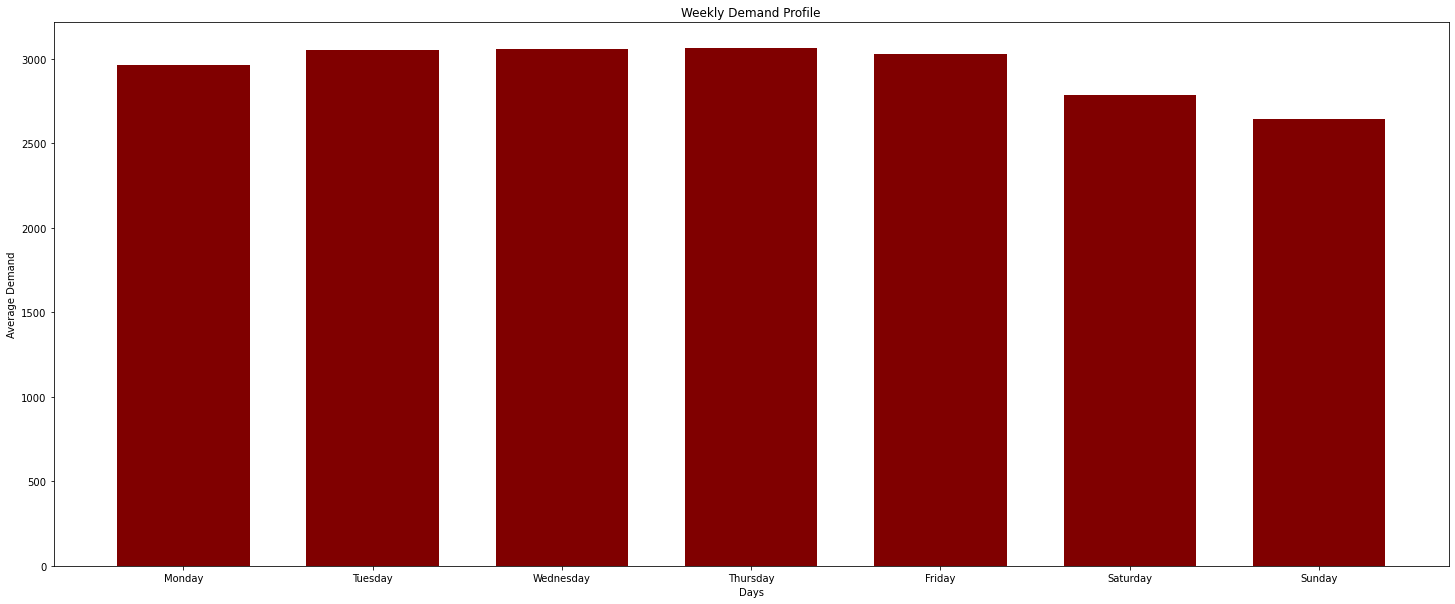

In [163]:
# plotting
plt.figure(figsize=(25,10))
plt.bar(daily_avg.index, daily_avg.values, color ='maroon',
        width = 0.7)
plt.xticks(daily_avg.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel("Days")
plt.ylabel("Average Demand")
plt.title("Weekly Demand Profile")
plt.show()

# 7

In [164]:
# Extract the date and hour from the datetime column
data['DateT'] = data['datetime'].dt.date
data['HourT'] = data['datetime'].dt.hour
data['Day'] = data['datetime'].dt.day_name()

#calculate the daily average for each hour
hourly_avg = data.groupby(['Day', 'HourT'])['Demand'].mean()
hourly_avg

# changing index
hourly_avg = hourly_avg.reset_index(level=[0,1])

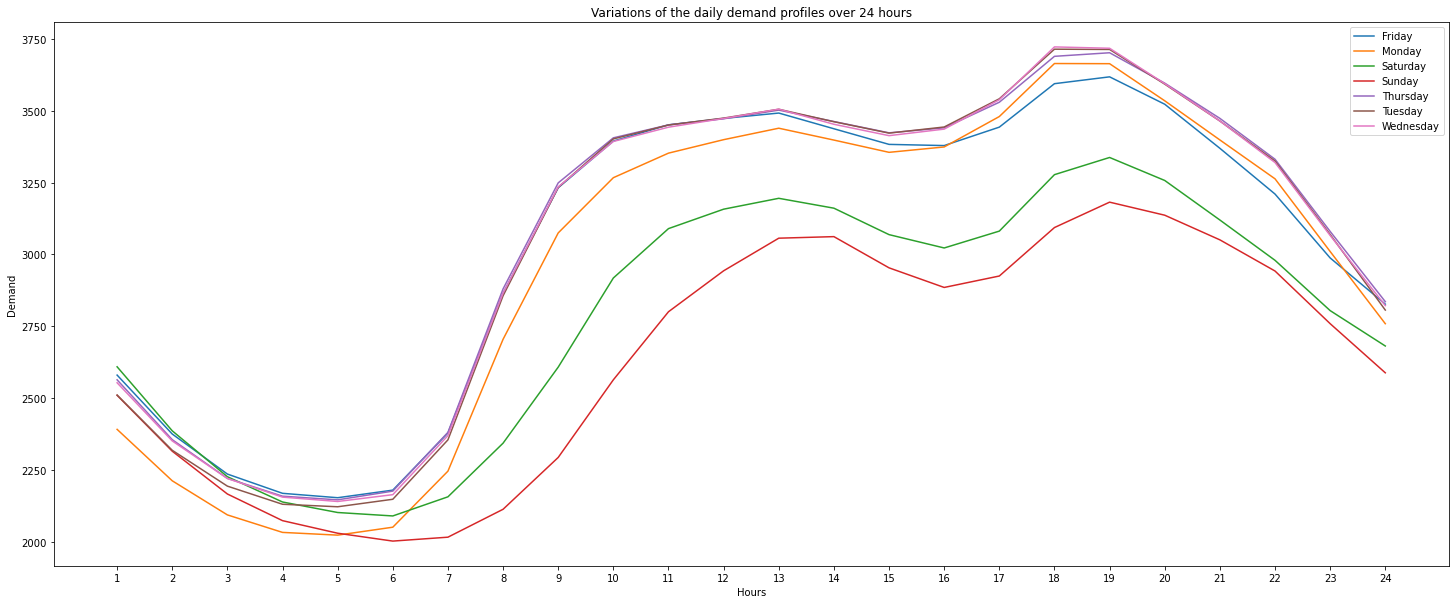

In [165]:
plt.figure(figsize=(25,10))
k = []
m = 0
d = 0
# Plotting daily demand over 24 hours
for j in range(0, 7):
    for i in range (0, 24):
        k.append(hourly_avg['Demand'][m])
        m = m+1
    plt.plot(range(0, 24), k, label = hourly_avg['Day'][d])
    d = d+24
    k = []
plt.legend()
plt.xticks(range(0, 24), range(1, 25))
plt.title('Variations of the daily demand profiles over 24 hours')
plt.xlabel('Hours')
plt.ylabel('Demand')
plt.show()

# 8 

In [166]:
data = df
# Create a new column indicating whether each date is a weekday or a weekend day
data['Weekday'] = data['datetime'].dt.weekday < 5

# Separate demand for weekdays and weekends
weekend_demand = data.loc[data['Weekday'] == False, 'Demand']
weekday_demand = data.loc[data['Weekday'] == True, 'Demand']


# Perform a two-sample t-test to compare the means of weekday_demand and weekend_demand
t_statistic, p_value = ttest_ind(weekday_demand, weekend_demand, equal_var=False)

if p_value > 0.05:
        print('There is no statistically significant difference between weekday and weekend demand (p-value={:.4f})'.format(p_value))
else:
    print('There is a statistically significant difference between weekday and weekend demand (p-value={:.4f})'.format(p_value))


There is a statistically significant difference between weekday and weekend demand (p-value=0.0000)


In [167]:
t_statistic

51.363399969318884

# 9

In [168]:
half_index = len(data) // 2

first_half = data[:half_index]
second_half = data[half_index:]
# first_half

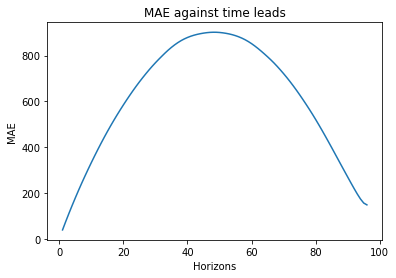

In [169]:
# Create predictions for testing set
errors = []
for i in range(1,97):
    predictions = second_half.shift(i)

    # Calculate Mean Absolute Error
    mae = abs(predictions['Demand'] - second_half['Demand']).mean()
    errors.append(mae)

plt.plot(range(1, 97), errors)
plt.ylabel('MAE')
plt.xlabel('Horizons')
plt.title('MAE against time leads')
plt.show()

# 10

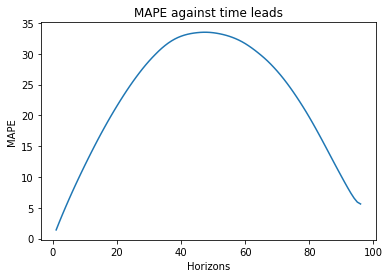

In [170]:
errors = []
for i in range(1,97):
    predictions = second_half.shift(i)
    # Calculate Mean Absolute percentage Error
    mape = mean_absolute_percentage_error(second_half['Demand'], predictions['Demand'].fillna(value = 0))*100
    errors.append(mape)

plt.plot(range(1, 97), errors)
plt.ylabel('MAPE')
plt.xlabel('Horizons')
plt.title('MAPE against time leads')
plt.show()